In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [ ]:
filepath="C:/Users/HP/Desktop/delitos.xlsx"
df=pd.read_excel(filepath)
df.head()


In [ ]:
df['Total'] = df.loc[:, 'Enero':'Diciembre'].sum(axis=1)

df.head()

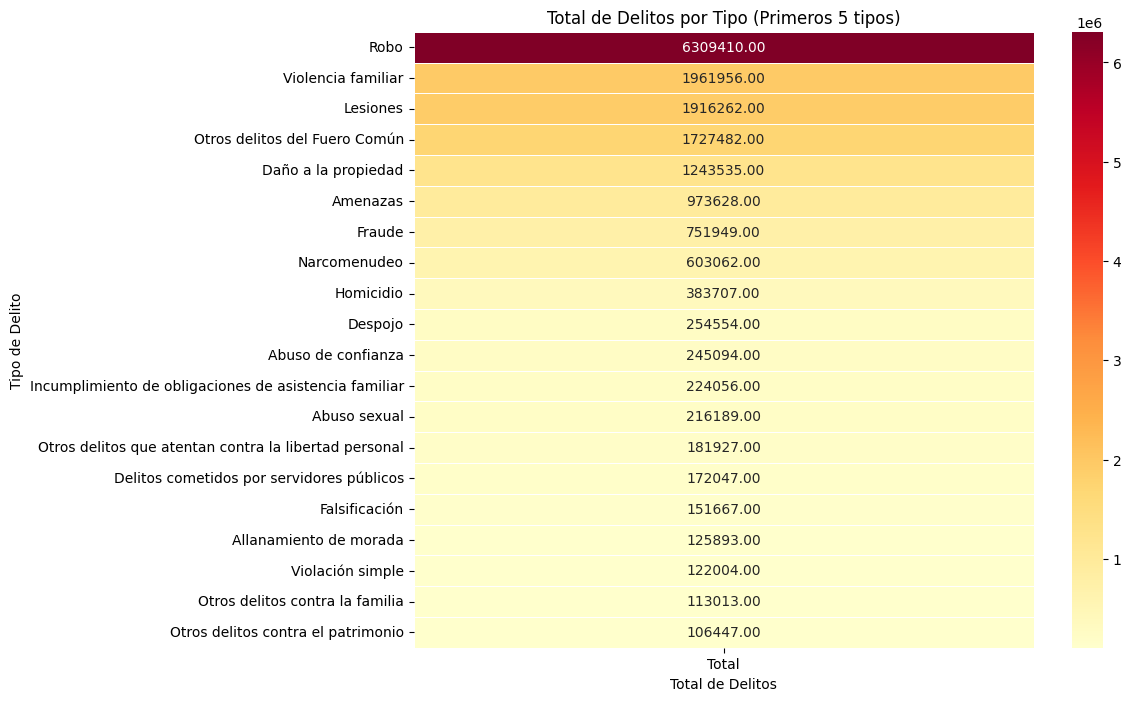

In [51]:
plt.figure(figsize=(10, 8))

sns.heatmap(delitos_por_tipo_ordenado.head(20).to_frame(), cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5)

plt.yticks(rotation=0)

plt.title('Total de Delitos por Tipo (Primeros 5 tipos)')
plt.xlabel('Total de Delitos')
plt.ylabel('Tipo de Delito')

plt.show()

cmap='YlOrRd',  # El mapa de colores que se utilizará. 'YlOrRd' representa una secuencia de amarillo a rojo.
annot=True,  # Si se debe anotar cada celda con el valor real.
fmt='.2f',  # El formato de cadena para la anotación. '.2f' significa que se mostrarán dos decimales.
linewidths=0.5  # El ancho de las líneas que separan cada celda.

In [ ]:
delitos_por_tipo = df.groupby('Tipo de delito')['Total'].sum()
print(delitos_por_tipo)

In [22]:
delitos_por_tipo = df.groupby('Tipo de delito')['Total'].sum()
delitos_por_tipo_ordenado = delitos_por_tipo.sort_values(ascending=False)
delitos_por_tipo_ordenado.head()


Tipo de delito
Robo                             6309410.0
Violencia familiar               1961956.0
Lesiones                         1916262.0
Otros delitos del Fuero Común    1727482.0
Daño a la propiedad              1243535.0
Name: Total, dtype: float64

In [53]:
delitos_por_tipo_estado = df.groupby(['Entidad', 'Tipo de delito'])['Total'].sum().unstack(fill_value=0)
delitos_por_tipo_estado.head()


Tipo de delito,Aborto,Abuso de confianza,Abuso sexual,Acoso sexual,Allanamiento de morada,Amenazas,Contra el medio ambiente,Corrupción de menores,Daño a la propiedad,Delitos cometidos por servidores públicos,...,Otros delitos que atentan contra la vida y la integridad corporal,Rapto,Robo,Secuestro,Trata de personas,Tráfico de menores,Violación equiparada,Violación simple,Violencia de género en todas sus modalidades distinta a la violencia familiar,Violencia familiar
Entidad,,,,,,,,,,,,,,,,,,,,,
Aguascalientes,77.0,6269.0,19.0,0.0,4289.0,26476.0,356.0,595.0,34197.0,2536.0,...,328.0,0.0,111933.0,58.0,24.0,6.0,793.0,1781.0,73.0,17223.0
Baja California,456.0,5738.0,12912.0,196.0,24483.0,41944.0,206.0,4385.0,79212.0,9243.0,...,14345.0,1.0,363930.0,127.0,353.0,22.0,3130.0,6008.0,0.0,102118.0
Baja California Sur,86.0,2805.0,2718.0,715.0,1664.0,12684.0,21.0,417.0,15918.0,2487.0,...,1251.0,1.0,73974.0,24.0,24.0,0.0,266.0,1779.0,38.0,22010.0
Campeche,14.0,998.0,1133.0,193.0,1367.0,7470.0,56.0,141.0,8089.0,344.0,...,812.0,0.0,21083.0,37.0,18.0,0.0,1425.0,658.0,0.0,5348.0
Chiapas,102.0,1465.0,1963.0,572.0,1089.0,7752.0,455.0,513.0,12415.0,2104.0,...,1031.0,32.0,53702.0,148.0,276.0,17.0,367.0,4720.0,1.0,29362.0


In [9]:
delitos_por_tipo_estado = df.groupby(['Tipo de delito', 'Entidad'])['Total'].sum().reset_index()
delitos_por_tipo_estado.head()

,Tipo de delito,Entidad,Total
0,Aborto,Aguascalientes,77.0
1,Aborto,Baja California,456.0
2,Aborto,Baja California Sur,86.0
3,Aborto,Campeche,14.0
4,Aborto,Chiapas,102.0


In [10]:
homicidios = df[df['Tipo de delito'] == 'Homicidio']

homicidios_por_estado = homicidios.groupby('Entidad')['Total'].sum().reset_index()
homicidios_por_estado.head(33)



,Entidad,Total
0,Aguascalientes,2249.0
1,Baja California,24143.0
2,Baja California Sur,2085.0
3,Campeche,1493.0
4,Chiapas,11995.0
5,Chihuahua,19006.0
6,Ciudad de México,15733.0
7,Coahuila de Zaragoza,4092.0
8,Colima,6497.0
9,Durango,3576.0


In [54]:
distribución = homicidios_por_estado.sort_values(by='Total', ascending=False)
distribución.head(5)


,Entidad,Total
10,Guanajuato,34134.0
16,México,32176.0
14,Michoacán de Ocampo,24391.0
1,Baja California,24143.0
13,Jalisco,22707.0


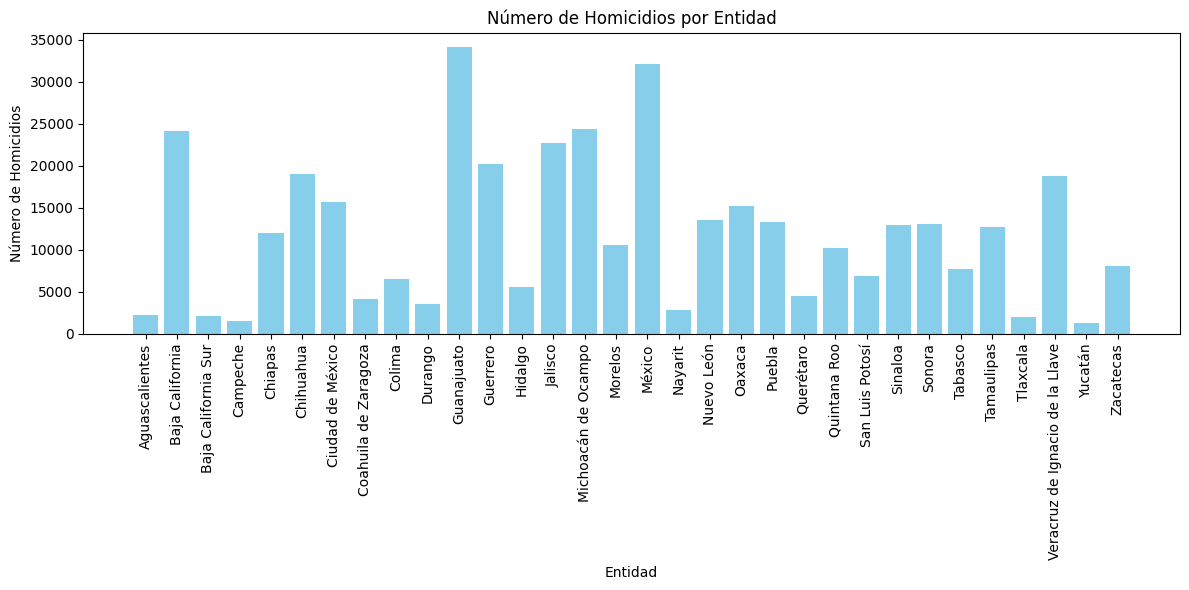

In [55]:

plt.figure(figsize=(12, 6))
plt.bar(homicidios_por_estado['Entidad'], homicidios_por_estado['Total'], color='skyblue')
plt.xlabel('Entidad')
plt.ylabel('Número de Homicidios')
plt.title('Número de Homicidios por Entidad')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.tight_layout()
plt.show()

In [56]:
Robos=df[df['Tipo de delito']== 'Robo']
Robo_por_estado= Robos.groupby('Entidad')['Total'].sum().reset_index()
Robo_por_estado.head()

,Entidad,Total
0,Aguascalientes,111933.0
1,Baja California,363930.0
2,Baja California Sur,73974.0
3,Campeche,21083.0
4,Chiapas,53702.0


In [57]:
def suma_delitos_por_estado(dataframe):
    entidad = input("Por favor, ingresa el nombre de la entidad: ").capitalize()
    print("Panorama de incidencia delictiva en:", entidad)  
    delitos_por_estado = dataframe[dataframe['Entidad'] == entidad].groupby('Tipo de delito')['Total'].sum()
    delitos_por_estado = delitos_por_estado.sort_values(ascending=False).head(33)  
    print(delitos_por_estado)

suma_delitos_por_estado(df)

Panorama de incidencia delictiva en: Oaxaca
Tipo de delito
Robo                                                                  92847.0
Violencia familiar                                                    50503.0
Lesiones                                                              42491.0
Amenazas                                                              28450.0
Daño a la propiedad                                                   21786.0
Homicidio                                                             15244.0
Otros delitos del Fuero Común                                         14806.0
Fraude                                                                12334.0
Otros delitos contra el patrimonio                                     8301.0
Despojo                                                                6244.0
Abuso sexual                                                           4302.0
Otros delitos contra la sociedad                                       3847.0
Viola

In [45]:
def suma_delitos(dataframe):
    tipo_delito = input("Por favor, ingresa el nombre del delito: ").capitalize()
    print("Panorama de incidencia delictiva para el delito:", tipo_delito)  
    delitos_por_estado = dataframe[dataframe['Tipo de delito'] == tipo_delito].groupby('Entidad')['Total'].sum()
    delitos_por_estado = delitos_por_estado.sort_values(ascending=False).head(33)  
    print(delitos_por_estado)

suma_delitos(df)

Panorama de incidencia delictiva para el delito: Robo
Entidad
México                             1386881.0
Ciudad de México                    826637.0
Jalisco                             543312.0
Baja California                     363930.0
Guanajuato                          329573.0
Puebla                              269304.0
Querétaro                           219928.0
Veracruz de Ignacio de la Llave     206211.0
Tabasco                             159966.0
Morelos                             156931.0
Nuevo León                          141604.0
Chihuahua                           141192.0
Michoacán de Ocampo                 140088.0
Quintana Roo                        130154.0
San Luis Potosí                     119248.0
Tamaulipas                          116907.0
Hidalgo                             116705.0
Aguascalientes                      111933.0
Oaxaca                               92847.0
Sonora                               87581.0
Durango                              7

In [39]:
def total_delitos_por_estado(dataframe, tipo_delito):
    print("Panorama de incidencia delictiva para el delito:", tipo_delito)
    delitos_por_estado = dataframe[dataframe['Tipo de delito'] == tipo_delito].groupby('Entidad')['Total'].sum()
    delitos_por_estado = delitos_por_estado.sort_values(ascending=False)
    print(delitos_por_estado)

tipo_delito = input("Por favor, ingresa el nombre del tipo de delito: ").capitalize()
total_delitos_por_estado(df, tipo_delito)


Panorama de incidencia delictiva para el delito: Robo
Entidad
México                             1386881.0
Ciudad de México                    826637.0
Jalisco                             543312.0
Baja California                     363930.0
Guanajuato                          329573.0
Puebla                              269304.0
Querétaro                           219928.0
Veracruz de Ignacio de la Llave     206211.0
Tabasco                             159966.0
Morelos                             156931.0
Nuevo León                          141604.0
Chihuahua                           141192.0
Michoacán de Ocampo                 140088.0
Quintana Roo                        130154.0
San Luis Potosí                     119248.0
Tamaulipas                          116907.0
Hidalgo                             116705.0
Aguascalientes                      111933.0
Oaxaca                               92847.0
Sonora                               87581.0
Durango                              7

In [ ]:
filepath= "C:/Users/HP/Downloads/Sales Analysis/data.csv"

coordenadas = pd.read_csv(filepath)



In [33]:
coordenadas.head()

,CVE_ENT,NOM_ENT,NOM_ABR,CVE_MUN,NOM_MUN,CVE_LOC,NOM_LOC,AMBITO,LAT_DEC,LON_DEC,ALTITUD,CVE_CARTA
0,1,Aguascalientes,Ags.,1,Aguascalientes,1,Aguascalientes,U,21.879823,-102.296047,1878,F13D19
1,1,Aguascalientes,Ags.,1,Aguascalientes,94,Granja Adelita,R,21.871875,-102.373531,1902,F13D18
2,1,Aguascalientes,Ags.,1,Aguascalientes,96,Agua Azul,R,21.883756,-102.357122,1861,F13D18
3,1,Aguascalientes,Ags.,1,Aguascalientes,100,Rancho Alegre,R,21.854599,-102.372746,1879,F13D18
4,1,Aguascalientes,Ags.,1,Aguascalientes,102,Los Arbolitos [Rancho],R,21.780181,-102.357295,1861,F13D18


In [34]:

coord = coordenadas[['NOM_ENT', 'LAT_DEC', 'LON_DEC']].copy()
coord.head()


,NOM_ENT,LAT_DEC,LON_DEC
0,Aguascalientes,21.879823,-102.296047
1,Aguascalientes,21.871875,-102.373531
2,Aguascalientes,21.883756,-102.357122
3,Aguascalientes,21.854599,-102.372746
4,Aguascalientes,21.780181,-102.357295


In [35]:

coord_grouped = coord.groupby('NOM_ENT').first().reset_index()
print(coord_grouped)


                            NOM_ENT    LAT_DEC     LON_DEC
0                    Aguascalientes  21.879823 -102.296047
1                   Baja California  31.808944 -116.595134
2               Baja California Sur  25.034434 -111.673218
3                          Campeche  20.371226  -90.050739
4                           Chiapas  15.340965  -92.674617
5                         Chihuahua  30.617734 -106.512415
6                  Ciudad de México  19.484103  -99.184361
7              Coahuila de Zaragoza  27.181944 -101.426389
8                            Colima  18.937073 -103.964997
9                           Durango  24.527263 -104.778374
10                       Guanajuato  20.450900 -101.528361
11                         Guerrero  16.861867  -99.886558
12                          Hidalgo  20.145848  -98.438434
13                          Jalisco  20.779444 -102.905278
14              Michoacán de Ocampo  19.496252 -101.332851
15                          Morelos  18.600002  -99.3695

In [36]:
import folium
from branca.colormap import LinearColormap


mexico_map = folium.Map(location=[23.6345, -102.5528], zoom_start=5)


colormap = LinearColormap(colors=['green', 'yellow', 'red'], index=[0, 1000, 5000], vmin=0, vmax=homicidios_por_estado['Total'].max())


for index, row in coord_grouped.iterrows():
    entidad = row['NOM_ENT']
    latitud = row['LAT_DEC']
    longitud = row['LON_DEC']
    
    
    homicidios = homicidios_por_estado[homicidios_por_estado['Entidad'] == entidad]['Total'].values
    total_homicidios = homicidios[0] if len(homicidios) > 0 else 0
    
   
    color = colormap(total_homicidios)
    
    folium.CircleMarker(
        location=[latitud, longitud],
        radius=total_homicidios / 5000,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.6,
        popup=f"{entidad}: {total_homicidios} homicidios"
    ).add_to(mexico_map)


colormap.add_to(mexico_map)


mexico_map
